#**Tugas Project Kelompok 11 Pengantar Data Mining**

##**Preprocessing Data Train**

###**Import**

In [123]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [124]:
#import dataset
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Female,1950-01-12,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,"9767 Snyder Summit Suite 944\r\nWest Jesse, FL...",erinfox@jones.info,16.0,NBF,5,NaN,1.0,R
1,1,Male,1965-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,"89313 Christina Divide\r\nGarciatown, ME 71630",ykoch@gmail.com,2.0,PUB,47,S,1.0,I
2,2,Female,1997-12-31,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,"896 Benjamin Shore Suite 035\r\nSamuelhaven, T...",wolfekayla@mills.com,13.0,PVT,189,NaN,1.0,I
3,3,Male,1963-01-09,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,"706 Crystal Roads\r\nNorth Marcus, NE 73557",ejackson@taylor.net,16.0,NBF,5,NaN,1.0,R
4,4,Female,1996-01-01,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,"821 Sara Falls Apt. 775\r\nSouth Sarah, AZ 45554",cannonshawn@strong.com,99.0,BRO,5,NaN,1.0,R


###**Informasi Dasar**

In [125]:
#hitung jumlah row dan column
rows = df.shape[0]
columns = df.shape[1]
df.shape

(31655, 21)

In [126]:
#tampilkan columns dan tipe datanya
df.dtypes

Unnamed: 0                int64
gender                   object
date_of_birth            object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
address                  object
email                    object
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

In [127]:
df.head()

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Female,1950-01-12,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,"9767 Snyder Summit Suite 944\r\nWest Jesse, FL...",erinfox@jones.info,16.0,NBF,5,NaN,1.0,R
1,1,Male,1965-01-08,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,"89313 Christina Divide\r\nGarciatown, ME 71630",ykoch@gmail.com,2.0,PUB,47,S,1.0,I
2,2,Female,1997-12-31,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,"896 Benjamin Shore Suite 035\r\nSamuelhaven, T...",wolfekayla@mills.com,13.0,PVT,189,NaN,1.0,I
3,3,Male,1963-01-09,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,"706 Crystal Roads\r\nNorth Marcus, NE 73557",ejackson@taylor.net,16.0,NBF,5,NaN,1.0,R
4,4,Female,1996-01-01,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,"821 Sara Falls Apt. 775\r\nSouth Sarah, AZ 45554",cannonshawn@strong.com,99.0,BRO,5,NaN,1.0,R


In [128]:
#tampilkan statistik sederhana
df.describe()

,Unnamed: 0,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code
count,31655.000000,31655.000000,31655.000000,31655.000000,31655.000000,31655.000000,30738.000000,31655.000000,31592.000000
mean,15827.000000,10.117422,1088.854020,90.434434,40.977002,0.247860,29.024953,80.390523,1.064352
std,9138.155722,2.558635,7417.324283,408.651402,11.968719,0.431777,35.437741,145.927065,0.716770
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000
25%,7913.500000,9.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
50%,15827.000000,10.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
75%,23740.500000,13.000000,0.000000,0.000000,45.000000,0.000000,16.000000,173.000000,1.000000
max,31654.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,99.000000,999.000000,19.000000


In [129]:
df.describe(include='all')

,Unnamed: 0,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
count,31655.000000,31655,31655,31655,31655,31655.000000,31655,31655,31655,31655.000000,31655.000000,31655.000000,31655.000000,31655,31655,30738.000000,31655,31655.000000,6647,31592.000000,31652
unique,NaN,2,73,7,16,NaN,7,14,6,NaN,NaN,NaN,NaN,31655,31171,NaN,10,NaN,7,NaN,4
top,NaN,Male,1986-01-03,Private,HS-grad,NaN,Married-civ-spouse,Exec-managerial,Husband,NaN,NaN,NaN,NaN,"78259 Tammy Shore\r\nAndreaport, AK 46996",gbrown@gmail.com,NaN,PVT,NaN,S,NaN,R
freq,NaN,21373,894,23278,10293,NaN,14696,4234,13045,NaN,NaN,NaN,NaN,1,5,NaN,18692,NaN,6015,NaN,18876
mean,15827.000000,NaN,NaN,NaN,NaN,10.117422,NaN,NaN,NaN,1088.854020,90.434434,40.977002,0.247860,NaN,NaN,29.024953,NaN,80.390523,NaN,1.064352,NaN
std,9138.155722,NaN,NaN,NaN,NaN,2.558635,NaN,NaN,NaN,7417.324283,408.651402,11.968719,0.431777,NaN,NaN,35.437741,NaN,145.927065,NaN,0.716770,NaN
min,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,NaN,1.000000,NaN,5.000000,NaN,1.000000,NaN
25%,7913.500000,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,0.000000,NaN,NaN,13.000000,NaN,5.000000,NaN,1.000000,NaN
50%,15827.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,0.000000,NaN,NaN,13.000000,NaN,5.000000,NaN,1.000000,NaN
75%,23740.500000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,0.000000,0.000000,45.000000,0.000000,NaN,NaN,16.000000,NaN,173.000000,NaN,1.000000,NaN


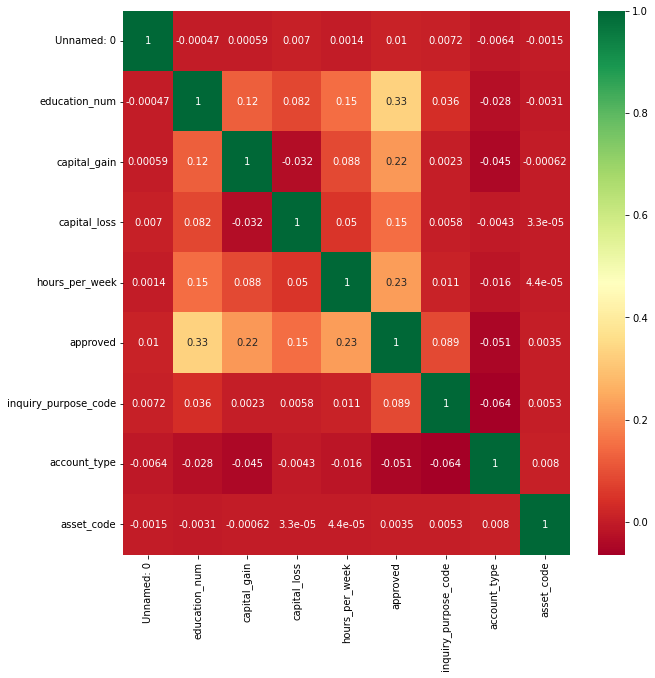

In [130]:
# independent columns 
K = df.drop(['approved'], axis=1)
# target columns --> approved
j = df['approved']

# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# plot heatmap
h = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###**Data Unrelated**

In [131]:
#cek column Unnamed: 0
df['Unnamed: 0'].is_unique

True

In [132]:
#hapus column Unnamed: 0
df.drop(columns='Unnamed: 0', inplace=True)

In [133]:
#cek column address
df['address'].is_unique

True

In [134]:
#hapus column adreess
df.drop(['address'], axis=1, inplace=True)

In [135]:
#cek column email
df['email'].is_unique

False

In [136]:
cek = df.groupby('email').size() > 1
cek.sum()

445

In [137]:
#hapus column adreess
df.drop(['email'], axis=1, inplace=True)

In [138]:
#hapus column date_of_birth
df.drop(['date_of_birth'], axis=1, inplace=True)

In [139]:
df.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,Female,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,16.0,NBF,5,NaN,1.0,R
1,Male,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,2.0,PUB,47,S,1.0,I
2,Female,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,13.0,PVT,189,NaN,1.0,I
3,Male,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,16.0,NBF,5,NaN,1.0,R
4,Female,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,99.0,BRO,5,NaN,1.0,R


In [140]:
df.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

###**Data Missing**

In [141]:
#cek missing value
df.isnull().sum()

gender                      0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
inquiry_purpose_code      917
institute_type              0
account_type                0
asset_class_cd          25008
asset_code                 63
portfolio_type              3
dtype: int64

In [142]:
#cek persentase missing value
df.isnull().sum()*100//rows

gender                   0
workclass                0
education_level          0
education_num            0
marital_status           0
occupation               0
relationship             0
capital_gain             0
capital_loss             0
hours_per_week           0
approved                 0
inquiry_purpose_code     2
institute_type           0
account_type             0
asset_class_cd          79
asset_code               0
portfolio_type           0
dtype: int64

**Keterangan:** Terdapat 4 columns yang memiliki missing value

**Solusi:** 
- Menghapus columns (persentase missing value tinggi) 
- Mengganti missing value dengan informasi statistik (mean, median, mode jika persentase missing value < 5%)
- Menghapus rows yang memiliki missing value (persentase jumlah baris yang memiliki missing value kecil)

In [143]:
#solusi 1: menghapus column asset_class_cd
df.drop(columns='asset_class_cd', inplace=True)

In [144]:
df.isnull().sum()

gender                    0
workclass                 0
education_level           0
education_num             0
marital_status            0
occupation                0
relationship              0
capital_gain              0
capital_loss              0
hours_per_week            0
approved                  0
inquiry_purpose_code    917
institute_type            0
account_type              0
asset_code               63
portfolio_type            3
dtype: int64

In [145]:
#solusi 2: mengganti missing value dengan mean
df = df.fillna(df.mean())
df.isnull().sum()

gender                  0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          3
dtype: int64

In [146]:
#solusi 3: menghapus rows yang memiliki missing value
df = df.dropna()
df.isnull().sum()

gender                  0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
approved                0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          0
dtype: int64

**Keterangan:** Missing value sudah ditangani

In [147]:
df.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,Female,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,16.0,NBF,5,1.0,R
1,Male,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,2.0,PUB,47,1.0,I
2,Female,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,13.0,PVT,189,1.0,I
3,Male,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,16.0,NBF,5,1.0,R
4,Female,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,99.0,BRO,5,1.0,R


In [148]:
df.shape

(31652, 16)

In [149]:
df.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
dtype: object

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31652 entries, 0 to 31654
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                31652 non-null  object 
 1   workclass             31652 non-null  object 
 2   education_level       31652 non-null  object 
 3   education_num         31652 non-null  float64
 4   marital_status        31652 non-null  object 
 5   occupation            31652 non-null  object 
 6   relationship          31652 non-null  object 
 7   capital_gain          31652 non-null  float64
 8   capital_loss          31652 non-null  float64
 9   hours_per_week        31652 non-null  float64
 10  approved              31652 non-null  int64  
 11  inquiry_purpose_code  31652 non-null  float64
 12  institute_type        31652 non-null  object 
 13  account_type          31652 non-null  int64  
 14  asset_code            31652 non-null  float64
 15  portfolio_type     

###**Data Outliers**

In [151]:
#mencari kuartil dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

education_num             4.0
capital_gain              0.0
capital_loss              0.0
hours_per_week            5.0
approved                  0.0
inquiry_purpose_code      3.0
account_type            168.0
asset_code                0.0
dtype: float64

In [152]:
df.shape

(31652, 16)

In [153]:
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(df.shape)

In [154]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]


In [155]:
#handle warning 
import warnings 
warnings.filterwarnings('ignore')

#outlier filter
df_align, IQR_new = df.align(IQR, axis=1, copy=False, join='outer')
outlier_filter = (df < Q1 - 1.5 * IQR_new) | (df > Q3 + 1.5 * IQR_new)
outlier_filter

,account_type,approved,asset_code,capital_gain,capital_loss,education_level,education_num,gender,hours_per_week,inquiry_purpose_code,institute_type,marital_status,occupation,portfolio_type,relationship,workclass
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31650,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
31651,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
31652,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False
31653,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [156]:
#menghitung outliers
outlier_filter.sum()

account_type              555
approved                 7845
asset_code               1060
capital_gain             2662
capital_loss             1528
education_level             0
education_num             207
gender                      0
hours_per_week           8282
inquiry_purpose_code    13795
institute_type              0
marital_status              0
occupation                  0
portfolio_type              0
relationship                0
workclass                   0
dtype: int64

###**Categorical Encoding** 

In [157]:
df.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,Female,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,16.0,NBF,5,1.0,R
1,Male,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,2.0,PUB,47,1.0,I
2,Female,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,13.0,PVT,189,1.0,I
3,Male,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,16.0,NBF,5,1.0,R
4,Female,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,99.0,BRO,5,1.0,R


In [158]:
df.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
approved                  int64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
dtype: object

In [159]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [160]:
df.groupby('gender').size()

gender
 Female    10282
 Male      21370
dtype: int64

In [161]:
#label encoding gender -> numerik
df['gender'] = label_encoder.fit_transform(df['gender'])
df.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,0,Local-gov,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,0.0,0.0,12.0,0,16.0,NBF,5,1.0,R
1,1,Private,Assoc-voc,11.0,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.0,20.0,0,2.0,PUB,47,1.0,I
2,0,Private,Assoc-voc,11.0,Never-married,Priv-house-serv,Not-in-family,0.0,0.0,30.0,0,13.0,PVT,189,1.0,I
3,1,Local-gov,Some-college,10.0,Widowed,Exec-managerial,Not-in-family,6849.0,0.0,40.0,0,16.0,NBF,5,1.0,R
4,0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Other-relative,0.0,0.0,20.0,1,99.0,BRO,5,1.0,R


In [162]:
#one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')

In [163]:
# df.groupby('date_of_birth').size()

In [164]:
# df = pd.get_dummies(df, columns = ["date_of_birth"])

In [165]:
df.groupby('workclass').size()

workclass
 Federal-gov           979
 Local-gov            2221
 Private             23276
 Self-emp-inc         1159
 Self-emp-not-inc     2642
 State-gov            1357
 Without-pay            18
dtype: int64

In [166]:
df = pd.get_dummies(df, columns = ["workclass"])

In [167]:
df.groupby('education_level').size()

education_level
 10th              867
 11th             1122
 12th              415
 1st-4th           151
 5th-6th           334
 7th-8th           572
 9th               473
 Assoc-acdm       1021
 Assoc-voc        1400
 Bachelors        5338
 Doctorate         356
 HS-grad         10293
 Masters          1805
 Preschool          56
 Prof-school       541
 Some-college     6908
dtype: int64

In [168]:
df = pd.get_dummies(df, columns = ["education_level"])

In [169]:
df.groupby('marital_status').size()

marital_status
 Divorced                  4402
 Married-AF-spouse           23
 Married-civ-spouse       14693
 Married-spouse-absent      382
 Never-married            10281
 Separated                  969
 Widowed                    902
dtype: int64

In [170]:
df = pd.get_dummies(df, columns = ["marital_status"])

In [171]:
df.groupby('occupation').size()

occupation
 Adm-clerical         3809
 Armed-Forces           11
 Craft-repair         4191
 Exec-managerial      4234
 Farming-fishing      1040
 Handlers-cleaners    1447
 Machine-op-inspct    2094
 Other-service        3354
 Priv-house-serv       170
 Prof-specialty       4207
 Protective-serv       681
 Sales                3761
 Tech-support         1015
 Transport-moving     1638
dtype: int64

In [172]:
df = pd.get_dummies(df, columns = ["occupation"])

In [173]:
df.groupby('relationship').size()

relationship
 Husband           13042
 Not-in-family      8232
 Other-relative      943
 Own-child          4647
 Unmarried          3350
 Wife               1438
dtype: int64

In [174]:
df = pd.get_dummies(df, columns = ["relationship"])

In [175]:
df.groupby('institute_type').size()

institute_type
BRO      217
COB       27
FOR       73
HFC      640
INS       25
NBF    11136
PUB      837
PVT    18690
SRC        3
TEL        4
dtype: int64

In [176]:
df = pd.get_dummies(df, columns = ["institute_type"])

In [177]:
df.groupby('portfolio_type').size()

portfolio_type
F       10
I    11978
M      788
R    18876
dtype: int64

In [178]:
df = pd.get_dummies(df, columns = ["portfolio_type"])

In [179]:
df.head()

,gender,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,institute_type_TEL,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,0,9.0,0.0,0.0,12.0,0,16.0,5,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,11.0,0.0,0.0,20.0,0,2.0,47,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,11.0,0.0,0.0,30.0,0,13.0,189,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,10.0,6849.0,0.0,40.0,0,16.0,5,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,13.0,0.0,0.0,20.0,1,99.0,5,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [180]:
df.dtypes

gender                  int64
education_num         float64
capital_gain          float64
capital_loss          float64
hours_per_week        float64
                       ...   
institute_type_TEL      uint8
portfolio_type_F        uint8
portfolio_type_I        uint8
portfolio_type_M        uint8
portfolio_type_R        uint8
Length: 73, dtype: object

In [181]:
df.shape

(31652, 73)

###**X_Train dan y_Train**

In [182]:
#variabel independent
X = df.drop(['approved'], axis=1)

#hapus variabel yang tidak ada di data test
X = X.drop(['institute_type_TEL'], axis=1)

In [183]:
X

,gender,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,0,9.0,0.0,0.0,12.0,16.000000,5,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,11.0,0.0,0.0,20.0,2.000000,47,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,11.0,0.0,0.0,30.0,13.000000,189,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,10.0,6849.0,0.0,40.0,16.000000,5,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,13.0,0.0,0.0,20.0,99.000000,5,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31650,1,7.0,0.0,0.0,15.0,13.000000,5,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
31651,1,5.0,0.0,0.0,40.0,7.000000,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
31652,1,13.0,0.0,2392.0,55.0,99.000000,47,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
31653,0,7.0,0.0,0.0,40.0,29.024953,5,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [185]:
#variabel dependent
y = df['approved']
y = pd.DataFrame(y)
y

,approved
0,0
1,0
2,0
3,0
4,1
...,...
31650,0
31651,0
31652,1
31653,0


###**Normalization**

In [187]:
from sklearn.preprocessing import StandardScaler

#membuat object Standard Scaler
standard_scaler = StandardScaler()
standard_scaler
# fit and transform the data
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

X

,gender,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,-1.441662,-0.436677,-0.146808,-0.221314,-2.420996,-0.373021,-0.516990,-0.089875,-0.178654,3.640225,-1.667001,-0.194958,-0.301781,-0.211643,-0.023854,-0.167819,-0.191705,-0.115263,-0.069235,-0.10327,-0.135662,-0.123168,-0.182571,-0.215123,-0.450397,-0.106655,1.440521,-0.245917,-0.0421,-0.131869,-0.528374,-0.401922,-0.026966,-0.930797,-0.110527,-0.693594,-0.17771,5.838742,2.703663,-0.018645,-0.390662,-0.392968,-0.184319,-0.218874,-0.266165,-0.344274,-0.073484,-0.391521,-0.148285,-0.367214,-0.182016,-0.233612,-0.837142,1.686711,-0.175236,-0.414824,-0.344044,-0.21816,-0.083085,-0.029219,-0.04808,-0.143656,-0.028115,1.357318,-0.164809,-1.200794,-0.009736,-0.017777,-0.780272,-0.159785,0.822702
1,0.693644,0.344983,-0.146808,-0.221314,-1.752601,-0.773921,-0.228642,-0.089875,-0.178654,-0.274708,0.599880,-0.194958,-0.301781,-0.211643,-0.023854,-0.167819,-0.191705,-0.115263,-0.069235,-0.10327,-0.135662,-0.123168,-0.182571,4.648502,-0.450397,-0.106655,-0.694193,-0.245917,-0.0421,-0.131869,-0.528374,-0.401922,-0.026966,1.074348,-0.110527,-0.693594,-0.17771,-0.171270,-0.369869,-0.018645,-0.390662,-0.392968,-0.184319,-0.218874,3.757069,-0.344274,-0.073484,-0.391521,-0.148285,-0.367214,-0.182016,-0.233612,1.194541,-0.592870,-0.175236,-0.414824,-0.344044,-0.21816,-0.083085,-0.029219,-0.04808,-0.143656,-0.028115,-0.736747,6.067620,-1.200794,-0.009736,-0.017777,1.281605,-0.159785,-1.215507
2,-1.441662,0.344983,-0.146808,-0.221314,-0.917108,-0.458929,0.746248,-0.089875,-0.178654,-0.274708,0.599880,-0.194958,-0.301781,-0.211643,-0.023854,-0.167819,-0.191705,-0.115263,-0.069235,-0.10327,-0.135662,-0.123168,-0.182571,4.648502,-0.450397,-0.106655,-0.694193,-0.245917,-0.0421,-0.131869,-0.528374,-0.401922,-0.026966,-0.930797,-0.110527,1.441766,-0.17771,-0.171270,-0.369869,-0.018645,-0.390662,-0.392968,-0.184319,-0.218874,-0.266165,-0.344274,13.608388,-0.391521,-0.148285,-0.367214,-0.182016,-0.233612,-0.837142,1.686711,-0.175236,-0.414824,-0.344044,-0.21816,-0.083085,-0.029219,-0.04808,-0.143656,-0.028115,-0.736747,-0.164809,0.832782,-0.009736,-0.017777,1.281605,-0.159785,-1.215507
3,0.693644,-0.045847,0.776542,-0.221314,-0.081614,-0.373021,-0.516990,-0.089875,-0.178654,3.640225,-1.667001,-0.194958,-0.301781,-0.211643,-0.023854,-0.167819,-0.191705,-0.115263,-0.069235,-0.10327,-0.135662,-0.123168,-0.182571,-0.215123,-0.450397,-0.106655,-0.69

###**Data Imbalance**

In [188]:
#menghitung value label approved
df['approved'].value_counts()

0    23807
1     7845
Name: approved, dtype: int64

In [189]:
df.groupby('approved').size()

approved
0    23807
1     7845
dtype: int64

(array([23807.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7845.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

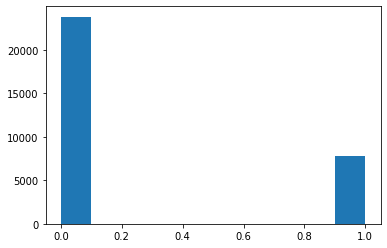

In [190]:
#visualisasi label approved
plt.hist(df['approved'])

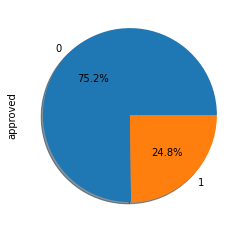

In [191]:
#visualisasi label dengan pie chart
df['approved'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

**Keterangan:** Data class (label) `aprroved` imbalance (tidak seimbang)

**Solusi:** Lakukan resampling (pengambilan sampel ulang)

In [192]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [194]:
#Metode SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)
X_sm, y_sm = smote.fit_resample(X, y)

In [197]:
X_sm = pd.DataFrame(X_sm)

In [198]:
y_sm = pd.DataFrame(y_sm)

In [200]:
#menghitung value label approved
y_sm['approved'].value_counts()

1    23807
0    23807
Name: approved, dtype: int64

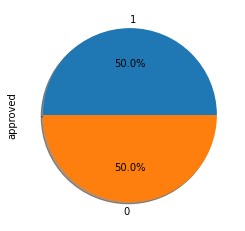

In [201]:
y_sm['approved'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

##**Modeling Data Train**

In [271]:
#Data awal
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.75%


In [272]:
#Data resampling
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1, stratify=y_sm)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.96%


**Keterangan:** Data resamling memiliki accuracy lebih tinggi daripada data awal pada data train. Sedangkan data awal memiliki accuracy lebih tinggi pada data test. Sehingga data yang digunakan dalam modeling adalah data awal 

In [273]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = X
y_train = y

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

##**Preprocessing Data  Test**

###**Pisahkan Index**

In [274]:
#data testing
test = pd.read_csv('test.csv')
test.head()

,Index,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Male,1996-12-31,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,"4310 Carr Keys Apt. 547\r\nNicoletown, MA 99102",krobinson@miller.com,13.0,PVT,47,S,1.0,I
1,1,Male,1988-01-03,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,"PSC 5755, Box 6774\r\nAPO AA 51628",jillwood@yahoo.com,99.0,PVT,5,NaN,1.0,R
2,2,Male,1970-01-07,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,USS Spence\r\nFPO AA 93452,mhobbs@hotmail.com,99.0,PVT,189,NaN,1.0,I
3,3,Male,1995-01-01,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,"141 Dennis Bypass\r\nWest Tony, NC 22819",thill@gmail.com,99.0,PVT,5,NaN,1.0,R
4,4,Female,1983-01-04,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,"384 Christopher Pine\r\nLeemouth, OR 39895",ocarlson@yahoo.com,13.0,PVT,189,S,1.0,I


In [275]:
#pisahkan index
index = test['Index']
index

0            0
1            1
2            2
3            3
4            4
         ...  
13562    13562
13563    13563
13564    13564
13565    13565
13566    13566
Name: Index, Length: 13567, dtype: int64

###**Informasi Dasar**

In [276]:
#hitung jumlah row dan column
rows = test.shape[0]
columns = test.shape[1]
test.shape

(13567, 20)

In [277]:
#tampilkan columns dan tipe datanya
test.dtypes

Index                     int64
gender                   object
date_of_birth            object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
address                  object
email                    object
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

In [278]:
test.head()

,Index,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,0,Male,1996-12-31,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,"4310 Carr Keys Apt. 547\r\nNicoletown, MA 99102",krobinson@miller.com,13.0,PVT,47,S,1.0,I
1,1,Male,1988-01-03,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,"PSC 5755, Box 6774\r\nAPO AA 51628",jillwood@yahoo.com,99.0,PVT,5,NaN,1.0,R
2,2,Male,1970-01-07,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,USS Spence\r\nFPO AA 93452,mhobbs@hotmail.com,99.0,PVT,189,NaN,1.0,I
3,3,Male,1995-01-01,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,"141 Dennis Bypass\r\nWest Tony, NC 22819",thill@gmail.com,99.0,PVT,5,NaN,1.0,R
4,4,Female,1983-01-04,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,"384 Christopher Pine\r\nLeemouth, OR 39895",ocarlson@yahoo.com,13.0,PVT,189,S,1.0,I


In [279]:
#tampilkan statistik sederhana
test.describe()

,Index,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code
count,13567.000000,13567.000000,13567.000000,13567.000000,13567.000000,13193.000000,13567.000000,13548.000000
mean,6783.000000,10.120882,1130.773863,84.304563,40.847055,28.730615,78.445566,1.062297
std,3916.599886,2.539497,7710.529584,396.181750,12.097482,35.289340,139.230454,0.699546
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000
25%,3391.500000,9.000000,0.000000,0.000000,40.000000,13.000000,5.000000,1.000000
50%,6783.000000,10.000000,0.000000,0.000000,40.000000,13.000000,5.000000,1.000000
75%,10174.500000,12.000000,0.000000,0.000000,45.000000,16.000000,173.000000,1.000000
max,13566.000000,16.000000,99999.000000,3770.000000,99.000000,99.000000,999.000000,19.000000


In [280]:
test.describe(include='all')

,Index,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
count,13567.000000,13567,13567,13567,13567,13567.000000,13567,13567,13567,13567.000000,13567.000000,13567.000000,13567,13567,13193.000000,13567,13567.000000,2845,13548.000000,13564
unique,NaN,2,72,7,16,NaN,7,14,6,NaN,NaN,NaN,13567,13482,NaN,9,NaN,7,NaN,4
top,NaN,Male,1987-01-03,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,NaN,NaN,NaN,"27972 Meyer Mountain\r\nSouth Mary, IA 93412",fsmith@gmail.com,NaN,PVT,NaN,S,NaN,R
freq,NaN,9154,396,10029,4490,NaN,6359,1828,5621,NaN,NaN,NaN,1,3,NaN,7977,NaN,2594,NaN,8091
mean,6783.000000,NaN,NaN,NaN,NaN,10.120882,NaN,NaN,NaN,1130.773863,84.304563,40.847055,NaN,NaN,28.730615,NaN,78.445566,NaN,1.062297,NaN
std,3916.599886,NaN,NaN,NaN,NaN,2.539497,NaN,NaN,NaN,7710.529584,396.181750,12.097482,NaN,NaN,35.289340,NaN,139.230454,NaN,0.699546,NaN
min,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,1.000000,NaN,5.000000,NaN,1.000000,NaN
25%,3391.500000,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,13.000000,NaN,5.000000,NaN,1.000000,NaN
50%,6783.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,13.000000,NaN,5.000000,NaN,1.000000,NaN
75%,10174.500000,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,16.000000,NaN,173.000000,NaN,1.000000,NaN


###**Data Unrelated**

In [281]:
#cek column index
test['Index'].is_unique

True

In [282]:
#hapus column adreess
test.drop(['Index'], axis=1, inplace=True)

In [283]:
#cek column address
test['address'].is_unique

True

In [284]:
#hapus column adreess
test.drop(['address'], axis=1, inplace=True)

In [285]:
#cek column email
test['email'].is_unique

False

In [286]:
test.groupby('email').size()

email
aalvarez@flowers.com         1
aanderson@obrien.net         1
aarcher@gmail.com            1
aarias@gmail.com             1
aaron03@gmail.com            1
                            ..
zwheeler@mays-sanchez.com    1
zwilkinson@yahoo.com         1
zwilliams@yahoo.com          1
zwood@west.com               1
zwood@yahoo.com              1
Length: 13482, dtype: int64

In [287]:
#hapus column adreess
test.drop(['email'], axis=1, inplace=True)

In [288]:
#hapus column adreess
test.drop(['date_of_birth'], axis=1, inplace=True)

In [289]:
test.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,Male,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,13.0,PVT,47,S,1.0,I
1,Male,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,99.0,PVT,5,NaN,1.0,R
2,Male,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,99.0,PVT,189,NaN,1.0,I
3,Male,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,99.0,PVT,5,NaN,1.0,R
4,Female,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,13.0,PVT,189,S,1.0,I


In [290]:
test.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_class_cd           object
asset_code              float64
portfolio_type           object
dtype: object

###**Data Missing**

In [291]:
#cek missing value
test.isnull().sum()

gender                      0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
inquiry_purpose_code      374
institute_type              0
account_type                0
asset_class_cd          10722
asset_code                 19
portfolio_type              3
dtype: int64

In [292]:
#cek persentase missing value
test.isnull().sum()*100//rows

gender                   0
workclass                0
education_level          0
education_num            0
marital_status           0
occupation               0
relationship             0
capital_gain             0
capital_loss             0
hours_per_week           0
inquiry_purpose_code     2
institute_type           0
account_type             0
asset_class_cd          79
asset_code               0
portfolio_type           0
dtype: int64

**Keterangan:** Terdapat 4 columns yang memiliki missing value

**Solusi:** 
- Menghapus columns (persentase missing value tinggi) 
- Mengganti missing value dengan informasi statistik (mean, median, mode jika persentase missing value < 5%)
- Menghapus rows yang memiliki missing value (persentase jumlah baris yang memiliki missing value kecil)

In [293]:
#solusi 1: menghapus column asset_class_cd
test.drop(columns='asset_class_cd', inplace=True)

In [294]:
test.isnull().sum()

gender                    0
workclass                 0
education_level           0
education_num             0
marital_status            0
occupation                0
relationship              0
capital_gain              0
capital_loss              0
hours_per_week            0
inquiry_purpose_code    374
institute_type            0
account_type              0
asset_code               19
portfolio_type            3
dtype: int64

In [295]:
#solusi 2: mengganti missing value dengan mean
test = test.fillna(df.mean())
test.isnull().sum()

gender                  0
workclass               0
education_level         0
education_num           0
marital_status          0
occupation              0
relationship            0
capital_gain            0
capital_loss            0
hours_per_week          0
inquiry_purpose_code    0
institute_type          0
account_type            0
asset_code              0
portfolio_type          3
dtype: int64

In [296]:
# #solusi 3: menghapus rows yang memiliki missing value
# test = test.dropna()
# test.isnull().sum()

**Keterangan:** Missing value sudah ditangani

In [297]:
test.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,Male,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,13.0,PVT,47,1.0,I
1,Male,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,99.0,PVT,5,1.0,R
2,Male,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,99.0,PVT,189,1.0,I
3,Male,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,99.0,PVT,5,1.0,R
4,Female,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,13.0,PVT,189,1.0,I


In [298]:
test.shape

(13567, 15)

In [299]:
test.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
dtype: object

###**Categorical Encoding** 

In [300]:
test.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,Male,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,13.0,PVT,47,1.0,I
1,Male,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,99.0,PVT,5,1.0,R
2,Male,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,99.0,PVT,189,1.0,I
3,Male,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,99.0,PVT,5,1.0,R
4,Female,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,13.0,PVT,189,1.0,I


In [301]:
test.dtypes

gender                   object
workclass                object
education_level          object
education_num           float64
marital_status           object
occupation               object
relationship             object
capital_gain            float64
capital_loss            float64
hours_per_week          float64
inquiry_purpose_code    float64
institute_type           object
account_type              int64
asset_code              float64
portfolio_type           object
dtype: object

In [302]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [303]:
test.groupby('gender').size()

gender
 Female    4413
 Male      9154
dtype: int64

In [304]:
#label encoding gender -> numerik
test['gender'] = label_encoder.fit_transform(test['gender'])
test.head()

,gender,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,institute_type,account_type,asset_code,portfolio_type
0,1,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,0.0,0.0,40.0,13.0,PVT,47,1.0,I
1,1,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,38.0,99.0,PVT,5,1.0,R
2,1,Local-gov,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,0.0,0.0,45.0,99.0,PVT,189,1.0,I
3,1,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,40.0,99.0,PVT,5,1.0,R
4,0,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,0.0,0.0,30.0,13.0,PVT,189,1.0,I


In [305]:
#one hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')

In [306]:
# test.groupby('date_of_birth').size()

In [307]:
# test = pd.get_dummies(test, columns = ["date_of_birth"])

In [308]:
test.groupby('workclass').size()

workclass
 Federal-gov           427
 Local-gov             878
 Private             10029
 Self-emp-inc          487
 Self-emp-not-inc     1154
 State-gov             589
 Without-pay             3
dtype: int64

In [309]:
test = pd.get_dummies(test, columns = ["workclass"])

In [310]:
test.groupby('education_level').size()

education_level
 10th             356
 11th             497
 12th             162
 1st-4th           71
 5th-6th          115
 7th-8th          251
 9th              203
 Assoc-acdm       486
 Assoc-voc        558
 Bachelors       2231
 Doctorate        188
 HS-grad         4490
 Masters          709
 Preschool         16
 Prof-school      244
 Some-college    2990
dtype: int64

In [311]:
test = pd.get_dummies(test, columns = ["education_level"])

In [312]:
test.groupby('marital_status').size()

marital_status
 Divorced                 1895
 Married-AF-spouse           9
 Married-civ-spouse       6359
 Married-spouse-absent     170
 Never-married            4317
 Separated                 442
 Widowed                   375
dtype: int64

In [313]:
test = pd.get_dummies(test, columns = ["marital_status"])

In [314]:
test.groupby('occupation').size()

occupation
 Adm-clerical         1731
 Armed-Forces            3
 Craft-repair         1828
 Exec-managerial      1750
 Farming-fishing       440
 Handlers-cleaners     599
 Machine-op-inspct     876
 Other-service        1454
 Priv-house-serv        62
 Prof-specialty       1801
 Protective-serv       295
 Sales                1647
 Tech-support          404
 Transport-moving      677
dtype: int64

In [315]:
test = pd.get_dummies(test, columns = ["occupation"])

In [316]:
test.groupby('relationship').size()

relationship
 Husband           5621
 Not-in-family     3470
 Other-relative     406
 Own-child         1979
 Unmarried         1438
 Wife               653
dtype: int64

In [317]:
test = pd.get_dummies(test, columns = ["relationship"])

In [318]:
test.groupby('institute_type').size()

institute_type
BRO      86
COB       8
FOR      34
HFC     266
INS      16
NBF    4790
PUB     389
PVT    7977
SRC       1
dtype: int64

In [319]:
test = pd.get_dummies(test, columns = ["institute_type"])

In [320]:
test.groupby('portfolio_type').size()

portfolio_type
F       5
I    5110
M     358
R    8091
dtype: int64

In [321]:
test = pd.get_dummies(test, columns = ["portfolio_type"])

In [322]:
test.head()

,gender,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,1,10.0,0.0,0.0,40.0,13.0,47,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,9.0,0.0,0.0,38.0,99.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,14.0,0.0,0.0,45.0,99.0,189,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,9.0,0.0,0.0,40.0,99.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,9.0,0.0,0.0,30.0,13.0,189,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [323]:
test.dtypes

gender                  int64
education_num         float64
capital_gain          float64
capital_loss          float64
hours_per_week        float64
                       ...   
institute_type_SRC      uint8
portfolio_type_F        uint8
portfolio_type_I        uint8
portfolio_type_M        uint8
portfolio_type_R        uint8
Length: 71, dtype: object

In [324]:
test.shape

(13567, 71)

###**X_Test**

In [325]:
#variabel independent
X_test = test
X_test

,gender,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,1,10.0,0.0,0.0,40.0,13.0,47,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,9.0,0.0,0.0,38.0,99.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,14.0,0.0,0.0,45.0,99.0,189,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,9.0,0.0,0.0,40.0,99.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,9.0,0.0,0.0,30.0,13.0,189,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,1,9.0,0.0,0.0,40.0,16.0,173,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
13563,0,13.0,0.0,0.0,50.0,99.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
13564,1,10.0,0.0,0.0,46.0,99.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
13565,1,9.0,0.0,0.0,45.0,7.0,5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


###**Normalization**

In [326]:
from sklearn.preprocessing import StandardScaler

#membuat object standard scaler
standard_scaler = StandardScaler()
standard_scaler

# fit and transform the data
X_test = pd.DataFrame(standard_scaler.fit_transform(X_test), columns=X_test.columns)

X_test

,gender,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,0.694323,-0.047602,-0.146659,-0.2128,-0.070022,-0.452286,-0.225861,-0.089123,-0.180267,-0.263047,0.593950,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,-0.703318,-0.234821,-0.034362,-0.13533,1.880813,-0.402932,-0.025765,-0.939263,-0.112647,1.463794,-0.183511,-0.168601,-0.382425,-0.014872,-0.394614,2.598571,-0.183081,-0.214920,-0.262727,-0.346463,-0.067756,-0.391239,-0.149088,-0.371714,-0.175192,-0.229175,-0.841071,1.705813,-0.175638,-0.413256,-0.344324,-0.224867,-0.079871,-0.02429,-0.050124,-0.141416,-0.034362,-0.738745,-0.171811,0.837117,-0.008586,-0.019201,1.286464,-0.164629,-1.215540
1,0.694323,-0.441396,-0.146659,-0.2128,-0.235351,2.019103,-0.527530,-0.089123,-0.180267,-0.263047,0.593950,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,1.421831,-0.234821,-0.034362,-0.13533,-0.531685,-0.402932,-0.025765,1.064665,-0.112647,-0.683156,-0.183511,-0.168601,-0.382425,-0.014872,-0.394614,-0.384827,-0.183081,4.652893,-0.262727,-0.346463,-0.067756,-0.391239,-0.149088,-0.371714,-0.175192,-0.229175,1.188961,-0.586231,-0.175638,-0.413256,-0.344324,-0.224867,-0.079871,-0.02429,-0.050124,-0.141416,-0.034362,-0.738745,-0.171811,0.837117,-0.008586,-0.019201,-0.777324,-0.164629,0.822679
2,0.694323,1.527571,-0.146659,-0.2128,0.343303,2.019103,0.794068,-0.089123,-0.180267,3.801600,-1.683643,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,-0.703318,4.258568,-0.034362,-0.13533,-0.531685,-0.402932,-0.025765,1.064665,-0.112647,-0.683156,-0.183511,-0.168601,-0.382425,-0.014872,-0.394614,-0.384827,-0.183081,-0.214920,-0.262727,-0.346463,-0.067756,2.555981,-0.149088,-0.371714,-0.175192,-0.229175,1.188961,-0.586231,-0.175638,-0.413256,-0.344324,-0.224867,-0.079871,-0.02429,-0.050124,-0.141416,-0.034362,-0.738745,-0.171811,0.837117,-0.008586,-0.019201,1.286464,-0.164629,-1.215540
3,0.694323,-0.441396,-0.146659,-0.2128,-0.070022,2.019103,-0.527530,-0.089123,-0.180267,-0.263047,0.593950,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,1.421831,

In [327]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X_test = pd.DataFrame(std_scaler.fit_transform(X_test), columns=X_test.columns)

X_test

,gender,education_num,capital_gain,capital_loss,hours_per_week,inquiry_purpose_code,account_type,asset_code,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,institute_type_BRO,institute_type_COB,institute_type_FOR,institute_type_HFC,institute_type_INS,institute_type_NBF,institute_type_PUB,institute_type_PVT,institute_type_SRC,portfolio_type_F,portfolio_type_I,portfolio_type_M,portfolio_type_R
0,0.694323,-0.047602,-0.146659,-0.2128,-0.070022,-0.452286,-0.225861,-0.089123,-0.180267,-0.263047,0.593950,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,-0.703318,-0.234821,-0.034362,-0.13533,1.880813,-0.402932,-0.025765,-0.939263,-0.112647,1.463794,-0.183511,-0.168601,-0.382425,-0.014872,-0.394614,2.598571,-0.183081,-0.214920,-0.262727,-0.346463,-0.067756,-0.391239,-0.149088,-0.371714,-0.175192,-0.229175,-0.841071,1.705813,-0.175638,-0.413256,-0.344324,-0.224867,-0.079871,-0.02429,-0.050124,-0.141416,-0.034362,-0.738745,-0.171811,0.837117,-0.008586,-0.019201,1.286464,-0.164629,-1.215540
1,0.694323,-0.441396,-0.146659,-0.2128,-0.235351,2.019103,-0.527530,-0.089123,-0.180267,-0.263047,0.593950,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,1.421831,-0.234821,-0.034362,-0.13533,-0.531685,-0.402932,-0.025765,1.064665,-0.112647,-0.683156,-0.183511,-0.168601,-0.382425,-0.014872,-0.394614,-0.384827,-0.183081,4.652893,-0.262727,-0.346463,-0.067756,-0.391239,-0.149088,-0.371714,-0.175192,-0.229175,1.188961,-0.586231,-0.175638,-0.413256,-0.344324,-0.224867,-0.079871,-0.02429,-0.050124,-0.141416,-0.034362,-0.738745,-0.171811,0.837117,-0.008586,-0.019201,-0.777324,-0.164629,0.822679
2,0.694323,1.527571,-0.146659,-0.2128,0.343303,2.019103,0.794068,-0.089123,-0.180267,3.801600,-1.683643,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,-0.703318,4.258568,-0.034362,-0.13533,-0.531685,-0.402932,-0.025765,1.064665,-0.112647,-0.683156,-0.183511,-0.168601,-0.382425,-0.014872,-0.394614,-0.384827,-0.183081,-0.214920,-0.262727,-0.346463,-0.067756,2.555981,-0.149088,-0.371714,-0.175192,-0.229175,1.188961,-0.586231,-0.175638,-0.413256,-0.344324,-0.224867,-0.079871,-0.02429,-0.050124,-0.141416,-0.034362,-0.738745,-0.171811,0.837117,-0.008586,-0.019201,1.286464,-0.164629,-1.215540
3,0.694323,-0.441396,-0.146659,-0.2128,-0.070022,2.019103,-0.527530,-0.089123,-0.180267,-0.263047,0.593950,-0.192957,-0.304905,-0.213036,-0.014872,-0.164156,-0.195003,-0.109932,-0.072531,-0.09246,-0.137293,-0.123248,-0.192751,-0.207107,-0.443629,-0.118541,1.421831,

##**Testing Data Test**

In [328]:
y_pred = model.predict(X_test)

In [329]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

##**Submission**

In [330]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,index,approved
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
13562,13562,0
13563,13563,0
13564,13564,0
13565,13565,0


In [332]:
data_predict = {'index': pd.Series(index),
               'approved' : pd.Series(y_pred)}

predict = pd.DataFrame(data_predict)

predict

,index,approved
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
13562,13562,0
13563,13563,1
13564,13564,0
13565,13565,0


In [333]:
predict.to_csv('submission6.csv', index=False)

In [334]:
submission = pd.read_csv('submission6.csv')
submission

,index,approved
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
13562,13562,0
13563,13563,1
13564,13564,0
13565,13565,0


In [335]:
submission.groupby('approved').size()

approved
0    11055
1     2512
dtype: int64

In [343]:
pembanding = pd.read_csv('submission4.csv')

In [344]:
pembanding.groupby('approved').size()

approved
0    11159
1     2408
dtype: int64